# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
#!python3 -m pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [4]:
cities


['mataura',
 'puerto ayora',
 'esperance',
 'tuktoyaktuk',
 'ponta do sol',
 'jamestown',
 'tilichiki',
 'amahai',
 'bethel',
 'atuona',
 'lompoc',
 'sarkikaraagac',
 'qaanaaq',
 'egvekinot',
 'naze',
 'nikolskoye',
 'zaragoza',
 'cape town',
 'bluff',
 'ushuaia',
 'rafaela',
 'sterling',
 'batagay-alyta',
 'mar del plata',
 'kholodnyy',
 'amudat',
 'talnakh',
 'puerto leguizamo',
 'dujuma',
 'eugene',
 'airai',
 'rikitea',
 'akyab',
 'barrow',
 'butaritari',
 'vostok',
 'dagami',
 'ewa beach',
 'avarua',
 'kimbe',
 'caravelas',
 'berlevag',
 'carnarvon',
 'carbondale',
 'boyolangu',
 'punta arenas',
 'uruguaiana',
 'hilo',
 'busselton',
 'urumqi',
 'lebu',
 'kavaratti',
 'matozinhos',
 'tiksi',
 'grand river south east',
 'quelimane',
 'olavarria',
 'san marcos de colon',
 'thompson',
 'saint george',
 'ngukurr',
 'kupang',
 'cidreira',
 'geelong',
 'castro',
 'hobart',
 'kapaa',
 'amderma',
 'louisbourg',
 'wulanhaote',
 'rawson',
 'port elizabeth',
 'leningradskiy',
 'vaini',
 'prov

In [5]:
# create an "extracts" data to get the temperature,humidity,cloudiness and wind speed
city_number_list = []
city_name_list = []
cloudiness_list = []
country_list = []
humidity_list = []
lat_list = []
temp_list = []
lng_list = []
wind_speed_list = []
city_list= []
# Loop through the list of cities and perform a request for data on each

from pprint import pprint
for city in cities:
    #jason response
    response_json = requests.get(query_url + city).json()
    #pprint(response_json)
    try:
   
        city_number = response_json['id']
        #city_number_list.append(city_number)
        
        city_name = response_json['name']
        
        
        country_name = response_json['sys']['country']
        #country_list.append(country_name)
        
        humidity = response_json['main']['humidity']
        #humidity_list.append(humidity)
        
        lat = response_json['coord']['lat']
        #lat_list.append(lat)
        
        temp = response_json['main']['temp']
        #temp_list.append(temp)
        
        lng = response_json['coord']['lon']
        #lng_list.append(lng)
        
        cloudiness = response_json['clouds']['all']
        #cloudiness_list.append(cloudiness)
        
        wind_speed = response_json['wind']['speed']
        #wind_speed_list.append(wind_speed)
        city_list.append({
            "City": city_name,
            "Cloudiness": cloudiness,
            "Country": country_name,
            "Humidity": humidity,
            "Lat": lat,
            "lng": lng,
            "Temp": temp,
            "Wind Speed": wind_speed
        })
        
        print(f"City Name: {city}, city Number: {city_number}")
              
    # print error message and go to nes city of there is an error
    except:
        print("record does not exist, look for next record")
        
              
            
        

City Name: mataura, city Number: 6201424
City Name: puerto ayora, city Number: 3652764
City Name: esperance, city Number: 2071860
City Name: tuktoyaktuk, city Number: 6170031
City Name: ponta do sol, city Number: 2264557
City Name: jamestown, city Number: 5122534
City Name: tilichiki, city Number: 2120591
City Name: amahai, city Number: 1651591
City Name: bethel, city Number: 5282297
City Name: atuona, city Number: 4020109
City Name: lompoc, city Number: 5367788
City Name: sarkikaraagac, city Number: 301539
City Name: qaanaaq, city Number: 3831208
City Name: egvekinot, city Number: 4031742
City Name: naze, city Number: 1855540
City Name: nikolskoye, city Number: 546105
City Name: zaragoza, city Number: 3104324
City Name: cape town, city Number: 3369157
City Name: bluff, city Number: 2206939
City Name: ushuaia, city Number: 3833367
City Name: rafaela, city Number: 3839479
City Name: sterling, city Number: 4787534
City Name: batagay-alyta, city Number: 2027042
City Name: mar del plata, c

City Name: tuatapere, city Number: 2180815
City Name: pevek, city Number: 2122090
City Name: bredasdorp, city Number: 1015776
City Name: clyde river, city Number: 5924351
record does not exist, look for next record
City Name: alugan, city Number: 1731248
City Name: botad, city Number: 1275218
City Name: asau, city Number: 686090
City Name: soria, city Number: 3108680
City Name: muros, city Number: 3115824
City Name: nuuk, city Number: 3421319
City Name: sisimiut, city Number: 3419842
City Name: severo-kurilsk, city Number: 2121385
City Name: toguchin, city Number: 1489508
City Name: geraldton, city Number: 2070998
City Name: hasaki, city Number: 2112802
City Name: kaitangata, city Number: 2208248
City Name: carutapera, city Number: 3402648
City Name: manokwari, city Number: 1636308
City Name: faanui, city Number: 4034551
City Name: ketchikan, city Number: 5554428
City Name: kostomuksha, city Number: 543899
City Name: norman wells, city Number: 6089245
City Name: narsaq, city Number: 34

City Name: kisangani, city Number: 212730
City Name: bulaevo, city Number: 1525014
City Name: verkhoyansk, city Number: 2013465
record does not exist, look for next record
record does not exist, look for next record
City Name: almaznyy, city Number: 582447
City Name: fare, city Number: 4034496
City Name: alekseyevsk, city Number: 2022083
City Name: hovd, city Number: 1516048
City Name: nukus, city Number: 601294
City Name: sur, city Number: 286245
City Name: kokoda, city Number: 2093691
record does not exist, look for next record
City Name: parrita, city Number: 3622537
City Name: moron, city Number: 3430545
City Name: viedma, city Number: 3832899
City Name: maumere, city Number: 1635815
record does not exist, look for next record
City Name: taguatinga, city Number: 6319623
City Name: krasnoselkup, city Number: 1502073
City Name: lima, city Number: 3936456
City Name: puro, city Number: 1692364
City Name: faya, city Number: 110690
City Name: kedrovyy, city Number: 1538641
City Name: bam

City Name: martapura, city Number: 1636022
City Name: mayo, city Number: 4362001
City Name: jacqueville, city Number: 2287778
City Name: gillette, city Number: 5826027
City Name: teahupoo, city Number: 4033543
City Name: ottawa, city Number: 6094817
City Name: hami, city Number: 1529484
City Name: verkhnevilyuysk, city Number: 2013639
City Name: llanes, city Number: 3118304
City Name: morros, city Number: 3394372
City Name: beringovskiy, city Number: 2126710
City Name: mahajanga, city Number: 1062663
City Name: kikwit, city Number: 2314705
City Name: spearfish, city Number: 5769288
City Name: mushie, city Number: 2312249
City Name: aksu, city Number: 1529660
City Name: benemerito de las americas, city Number: 3816362
City Name: cockburn town, city Number: 3576994
City Name: krasnaya gora, city Number: 542788
City Name: lebedinyy, city Number: 2020871
record does not exist, look for next record
City Name: luanda, city Number: 2240449
City Name: qaqortoq, city Number: 3420846
City Name: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:

# create df
weather_data = pd.DataFrame(city_list)

weather_data.count()


City          574
Cloudiness    574
Country       574
Humidity      574
Lat           574
lng           574
Temp          574
Wind Speed    574
dtype: int64

In [7]:
weather_data

,City,Cloudiness,Country,Humidity,Lat,lng,Temp,Wind Speed
0,Mataura,72,NZ,93,-46.1927,168.8643,9.44,0.45
1,Puerto Ayora,20,EC,74,-0.7393,-90.3518,27.18,8.23
2,Esperance,97,AU,88,-33.8667,121.9000,14.00,4.63
3,Tuktoyaktuk,75,CA,67,69.4541,-133.0374,-8.00,4.63
4,Ponta do Sol,58,PT,80,32.6667,-17.1000,13.49,1.79
...,...,...,...,...,...,...,...,...
569,Hoquiam,90,US,76,46.9809,-123.8893,11.12,5.14
570,Nago,75,JP,88,26.5881,127.9761,18.96,7.20
571,Turbat,0,PK,33,26.0023,63.0440,29.10,0.22
572,Mananara,76,MG,94,-16.1667,49.7667,21.44,2.22


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
weather_data["Humidity"].describe()


count    574.000000
mean      69.783972
std       22.515196
min        6.000000
25%       58.000000
50%       76.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

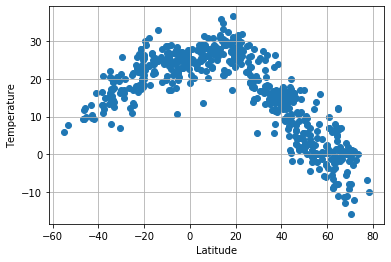

In [10]:
x_values = weather_data['Lat']
y_values = weather_data['Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(True)
plt.savefig("lat_temp.png")
plt.show()

In [11]:
#Analysis: Highest Temp is found at 0 latitude.Temperature drops as the latitude increase or decrease
    

## Latitude vs. Humidity Plot

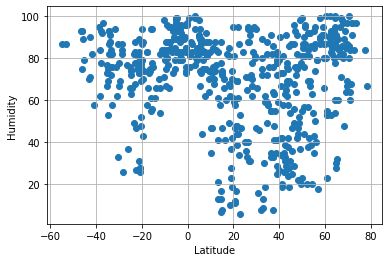

In [12]:
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
plt.savefig('lat_humidity.png')
plt.show()

In [13]:
#ANALYSIS: As latitude gets higher, humidity gets higher.Polar regions have lower humidity and southern regions have higher humidity


## Latitude vs. Cloudiness Plot

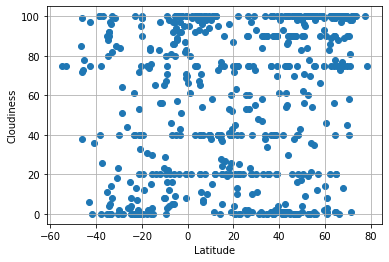

In [14]:
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
plt.savefig("lat_cloudiness.png")
plt.show()

In [15]:
#ANALYSIS: cloudiness data is widely spread across the latitude.so there is not a significant difference between latitude and cloudiness


## Latitude vs. Wind Speed Plot

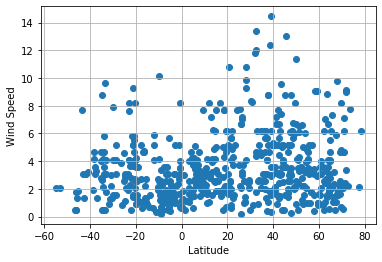

In [16]:
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.savefig("lat_windspeed.png")
plt.show()

In [17]:
#ANALYSIS: Wind speed data is widely spread. According to this plot wind speed is low across the latitide.

## Linear Regression

In [19]:
# Create Northern Hemisphere data frame
Northern_Hemisphere = weather_data.loc[weather_data["Lat"] >= 0, :]
Northern_Hemisphere

,City,Cloudiness,Country,Humidity,Lat,lng,Temp,Wind Speed
3,Tuktoyaktuk,75,CA,67,69.4541,-133.0374,-8.00,4.63
4,Ponta do Sol,58,PT,80,32.6667,-17.1000,13.49,1.79
5,Jamestown,1,US,35,42.0970,-79.2353,12.00,5.14
6,Tilichiki,46,RU,80,60.4667,166.1000,-3.73,1.57
8,Bethel,1,US,19,41.3712,-73.4140,15.66,6.69
...,...,...,...,...,...,...,...,...
567,Havøysund,75,NO,64,70.9963,24.6622,0.00,4.63
569,Hoquiam,90,US,76,46.9809,-123.8893,11.12,5.14
570,Nago,75,JP,88,26.5881,127.9761,18.96,7.20
571,Turbat,0,PK,33,26.0023,63.0440,29.10,0.22


In [29]:
# Creat Southern Hemisphere data frame
Southern_Hemisphere = weather_data.loc[weather_data["Lat"] < 0, :]
Southern_Hemisphere


,City,Cloudiness,Country,Humidity,Lat,lng,Temp,Wind Speed
0,Mataura,72,NZ,93,-46.1927,168.8643,9.44,0.45
1,Puerto Ayora,20,EC,74,-0.7393,-90.3518,27.18,8.23
2,Esperance,97,AU,88,-33.8667,121.9000,14.00,4.63
7,Amahai,43,ID,79,-3.3333,128.9167,27.22,1.31
9,Atuona,29,PF,79,-9.8000,-139.0333,26.83,10.15
...,...,...,...,...,...,...,...,...
557,Omboué,95,GA,89,-1.5746,9.2618,25.63,2.37
558,Aripuanã,71,BR,96,-9.1667,-60.6333,23.42,0.21
566,Nhulunbuy,97,AU,54,-12.2333,136.7667,28.00,5.14
568,Roebourne,0,AU,28,-20.7833,117.1333,23.74,5.84


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [34]:
# Create linear aggresion between latitude and temperature

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Northern_Hemisphere["Lat"], Northern_Hemisphere["Temp"])

# regression values
regress_values = Northern_Hemisphere["Lat"] * slope + intercept
print(regress_values)

# Create line equation 
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

3      -2.638733
4      16.396071
5      11.516576
6       2.011593
8      11.892125
         ...    
567    -3.436710
569     8.989513
570    19.541304
571    19.844413
573     2.368204
Name: Lat, Length: 391, dtype: float64
y = -0.52x + 33.30


The r-value is: 0.8027223708778484


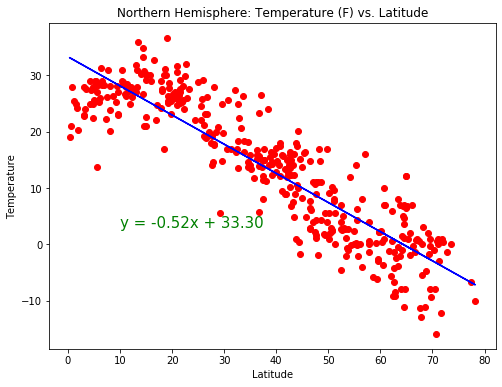

In [36]:
# plot Northern Hemisphere: latitude vs Temprature
plt.figure(figsize=(8,6))
plt.scatter(Northern_Hemisphere["Lat"], Northern_Hemisphere["Temp"], marker = "o", color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title(f"Northern Hemisphere: Temperature (F) vs. Latitude")


plt.plot(Northern_Hemisphere["Lat"], regress_values,"b-")
plt.annotate(line_eq, (10,3), fontsize=15, color="g")

# Print r square value
print(f'The r-value is: {rvalue**2}')

# plt.savefig("./Images/north_lat_temp.png")

# Show plot
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [43]:
# Create linear aggresion between latitude and temperature

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Southern_Hemisphere["Lat"], Southern_Hemisphere["Temp"])

# regression values
regress_values = Southern_Hemisphere["Lat"] * slope + intercept
print(regress_values)

# Create line equation 
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

0      12.500561
1      27.171070
2      16.478893
7      26.333832
9      24.246645
         ...    
557    26.901469
558    24.451048
566    23.461274
568    20.701682
572    22.191733
Name: Lat, Length: 183, dtype: float64
y = 0.32x + 27.41


The r-value is: 0.026673168453862955


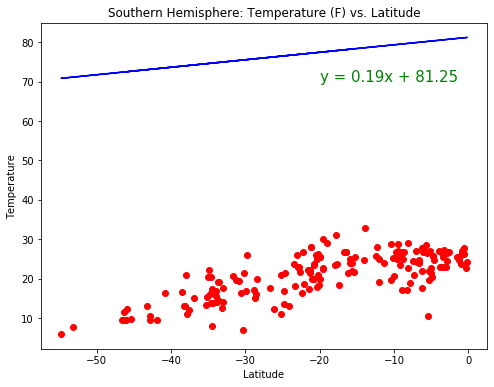

In [64]:

# plot Southern Hemisphere: latitude vs Temprature
plt.figure(figsize=(8,6))
plt.scatter(Southern_Hemisphere["Lat"], Southern_Hemisphere["Temp"], marker = "o", color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title(f"Southern Hemisphere: Temperature (F) vs. Latitude")


plt.plot(Southern_Hemisphere["Lat"], regress_values,"b-")
plt.annotate(line_eq, (-20,70), fontsize=15, color="g")

# Print r square value
print(f'The r-value is: {rvalue**2}')

# plt.savefig("./Images/north_lat_temp.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [44]:
# Create linear aggresion between latitude and Humidity

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Northern_Hemisphere["Lat"], Northern_Hemisphere["Humidity"])

# regression values
regress_values = Northern_Hemisphere["Lat"] * slope + intercept
print(regress_values)

# Create line equation 
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

3      70.376461
4      65.418960
5      66.689795
6      69.165311
8      66.591985
         ...    
567    70.584289
569    67.347953
570    64.599802
571    64.520860
573    69.072434
Name: Lat, Length: 391, dtype: float64
y = 0.13x + 61.02


The r-value is: 0.01287076093887247


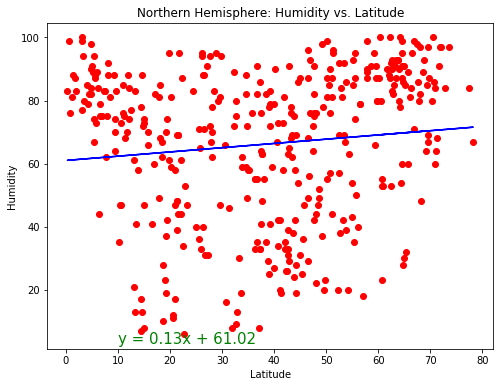

In [45]:
# plot Northern Hemisphere: latitude vs Humidity
plt.figure(figsize=(8,6))
plt.scatter(Northern_Hemisphere["Lat"], Northern_Hemisphere["Humidity"], marker = "o", color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Northern Hemisphere: Humidity vs. Latitude")


plt.plot(Northern_Hemisphere["Lat"], regress_values,"b-")
plt.annotate(line_eq, (10,3), fontsize=15, color="g")

# Print r square value
print(f'The r-value is: {rvalue**2}')

# plt.savefig("./Images/north_lat_temp.png")

# Show plot
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [47]:
# Create linear aggresion between latitude and Humidity

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Southern_Hemisphere["Lat"], Southern_Hemisphere["Humidity"])

# regression values
regress_values = Southern_Hemisphere["Lat"] * slope + intercept
print(regress_values)

# Create line equation 
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'

print(line_eq)

0      72.480850
1      81.106262
2      74.819879
7      80.614014
9      79.386869
         ...    
557    80.947752
558    79.507046
566    78.925116
568    77.302635
572    78.178699
Name: Lat, Length: 183, dtype: float64
y = 0.19x + 81.25


The r-value is: 0.026673168453862955


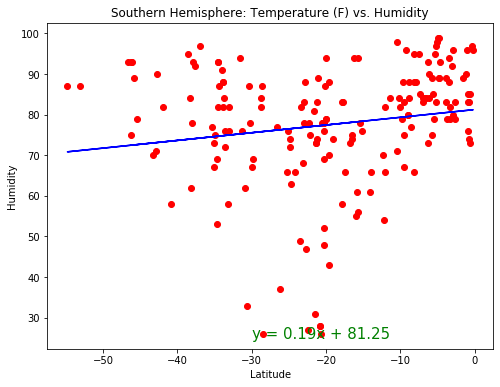

In [51]:
# plot Southern Hemisphere: latitude vs Humidity
plt.figure(figsize=(8,6))
plt.scatter(Southern_Hemisphere["Lat"], Southern_Hemisphere["Humidity"], marker = "o", color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Southern Hemisphere: Temperature (F) vs. Humidity")


plt.plot(Southern_Hemisphere["Lat"], regress_values,"b-")
plt.annotate(line_eq, (-30,25), fontsize=15, color="g")

# Print r square value
print(f'The r-value is: {rvalue**2}')

# plt.savefig("./Images/north_lat_temp.png")

# Show plot
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [65]:
# Create linear aggresion between latitude and Cloudiness

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Northern_Hemisphere["Lat"], Northern_Hemisphere["Cloudiness"])

# regression values
regress_values = Northern_Hemisphere["Lat"] * slope + intercept
print(regress_values)

# Create line equation 
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

3      65.584588
4      55.881439
5      58.368802
6      63.214046
8      58.177363
         ...    
567    65.991363
569    59.656993
570    54.278130
571    54.123618
573    63.032261
Name: Lat, Length: 391, dtype: float64
y = 0.26x + 47.27


The r-value is: 0.02046743503814531


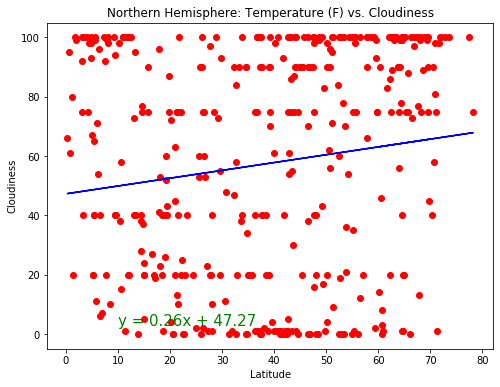

In [66]:
# plot Northern Hemisphere: latitude vs Cloudiness
plt.figure(figsize=(8,6))
plt.scatter(Northern_Hemisphere["Lat"], Northern_Hemisphere["Cloudiness"], marker = "o", color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Northern Hemisphere: Temperature (F) vs. Cloudiness")


plt.plot(Northern_Hemisphere["Lat"], regress_values,"b-")
plt.annotate(line_eq, (10,3), fontsize=15, color="g")

# Print r square value
print(f'The r-value is: {rvalue**2}')

# plt.savefig("./Images/north_lat_temp.png")

# Show plot
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [67]:
# Create linear aggresion between latitude and Cloudiness

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Southern_Hemisphere["Lat"], Southern_Hemisphere["Cloudiness"])

# regression values
regress_values = Southern_Hemisphere["Lat"] * slope + intercept
print(regress_values)

# Create line equation 
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'

print(line_eq)

0      41.413304
1      54.419524
2      44.940316
7      53.677266
9      51.826859
         ...    
557    54.180508
558    52.008074
566    51.130584
568    48.684053
572    50.005065
Name: Lat, Length: 183, dtype: float64
y = 0.29x + 54.63


The r-value is: 0.009942339054038015


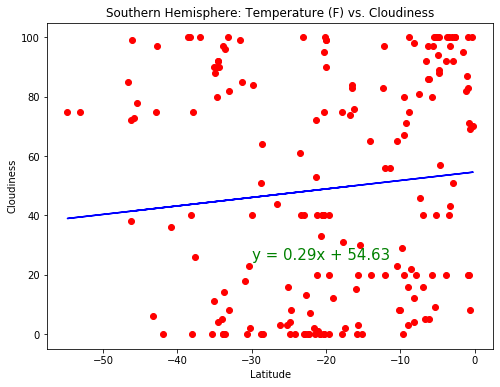

In [68]:
# plot Southern Hemisphere: latitude vs Cloudiness
plt.figure(figsize=(8,6))
plt.scatter(Southern_Hemisphere["Lat"], Southern_Hemisphere["Cloudiness"], marker = "o", color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Southern Hemisphere: Temperature (F) vs. Cloudiness")


plt.plot(Southern_Hemisphere["Lat"], regress_values,"b-")
plt.annotate(line_eq, (-30,25), fontsize=15, color="g")

# Print r square value
print(f'The r-value is: {rvalue**2}')

# plt.savefig("./Images/north_lat_temp.png")

# Show plot
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [69]:
# Create linear aggresion between latitude and Wind Speed

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Northern_Hemisphere["Lat"], Northern_Hemisphere["Wind Speed"])

# regression values
regress_values = Northern_Hemisphere["Lat"] * slope + intercept
print(regress_values)

# Create line equation 
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

3      3.950826
4      3.758793
5      3.808020
6      3.903911
8      3.804231
         ...   
567    3.958876
569    3.833514
570    3.727062
571    3.724004
573    3.900313
Name: Lat, Length: 391, dtype: float64
y = 0.01x + 3.59


The r-value is: 0.0018138820440036824


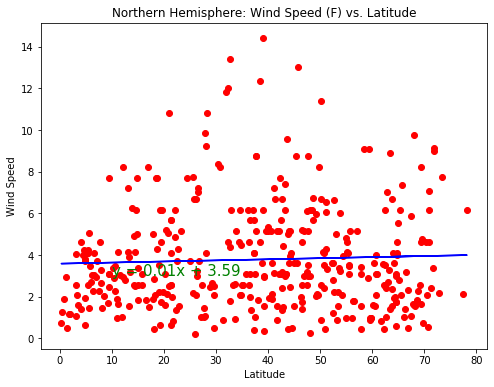

In [70]:
# plot Northern Hemisphere: latitude vs Wind Speed
plt.figure(figsize=(8,6))
plt.scatter(Northern_Hemisphere["Lat"], Northern_Hemisphere["Wind Speed"], marker = "o", color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Northern Hemisphere: Wind Speed (F) vs. Latitude")


plt.plot(Northern_Hemisphere["Lat"], regress_values,"b-")
plt.annotate(line_eq, (10,3), fontsize=15, color="g")

# Print r square value
print(f'The r-value is: {rvalue**2}')

# plt.savefig("./Images/north_lat_temp.png")

# Show plot
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [71]:
# Create linear aggresion between latitude and Wind Speed

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Southern_Hemisphere["Lat"], Southern_Hemisphere["Wind Speed"])

# regression values
regress_values = Southern_Hemisphere["Lat"] * slope + intercept
print(regress_values)

# Create line equation 
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

0      3.335142
1      2.454642
2      3.096369
7      2.504891
9      2.630161
         ...   
557    2.470823
558    2.617893
566    2.677298
568    2.842924
572    2.753494
Name: Lat, Length: 183, dtype: float64
y = -0.02x + 2.44


The r-value is: 0.016305388375594625


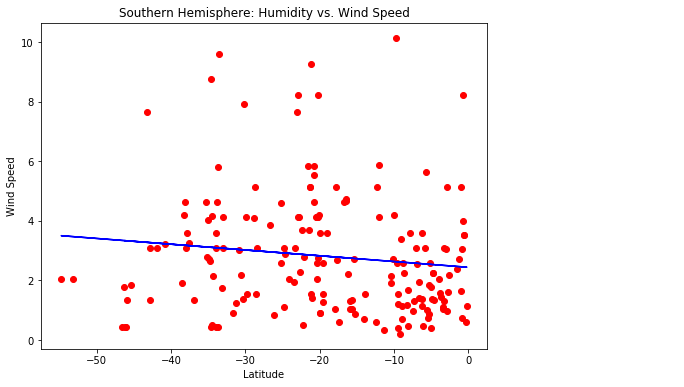

In [72]:
# plot Southern Hemisphere: latitude vs Wind speed
plt.figure(figsize=(8,6))
plt.scatter(Southern_Hemisphere["Lat"], Southern_Hemisphere["Wind Speed"], marker = "o", color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Southern Hemisphere: Humidity vs. Wind Speed")


plt.plot(Southern_Hemisphere["Lat"], regress_values,"b-")
plt.annotate(line_eq, (10,3), fontsize=15, color="g")

# Print r square value
print(f'The r-value is: {rvalue**2}')

# plt.savefig("./Images/north_lat_temp.png")

# Show plot
plt.show()
